<img src="https://github.com/mtreinish/qiskit-workshop/blob/master/qiskit-heading.png?raw=1" alt="Drawing" style="width: 300px;"/>

# Installation

1.   List item
2.   List item



*If* you have not installed Qiskit before (or you are running in colab) you can run the following cell to install it:

In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=cdf8f426b0cdd1d1306e4e140af9e1d273d2fc121021988b1eaa0be548b5d71a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556

Once we have Qiskit is installed we want to test that it's working properly.

In [ ]:
print("Hello World")

Hello World


In [ ]:
import qiskit
qiskit.__version__

'0.45.1'

In [ ]:
qiskit.__qiskit_version__

{'qiskit': '0.45.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Single qubit states: basic formulas

In the lecture, we learned that single qubit states can be written down generally as

$$|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right) e^{i\phi}|1\rangle$$

The probability to measure the state $|0\rangle$ is equal to

$$ P(|0\rangle) \equiv p_0 =\cos^2 \left(\frac{\theta}{2}\right) $$

The probability to measure the state $|1\rangle$ is equal to

$$ P(|1\rangle) \equiv p_1 =\sin^2 \left(\frac{\theta}{2}\right) $$

Therefore we can rewrite the state $|\psi\rangle$ equivalently as

$$|\psi\rangle = \sqrt{1-p_1}\ \vert0\rangle + e^{i\phi}\sqrt{p_1}\ \vert1\rangle$$

or as

$$|\psi\rangle = \sqrt{p_0}\ \vert0\rangle + e^{i\phi}\sqrt{1-p_0}\ \vert1\rangle$$


Here, $p_0$ ($p_1$) is the probability that a measurement of the state $|\psi\rangle$ in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $0$ ($1$), and $\phi$ is the phase between the two computational basis states. Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.

Finally, for a general state

$$ \vert \psi \rangle = \begin{bmatrix}a\\b\end{bmatrix}$$

the state matrix is

$$ \vert \psi \rangle \langle \psi \vert = \begin{bmatrix}a\\b\end{bmatrix} \begin{bmatrix}a^* & b^*\end{bmatrix} = \begin{bmatrix}aa^* & ab^* \\ ba^* & bb^* \end{bmatrix}$$


# Single qubit circuits - the most trivial example



Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


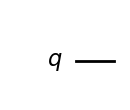

In [ ]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state.


# Creating the $\vert 0 \rangle$ state

To see this clearly, let's create the statevector $\vert \psi\rangle =\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [ ]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')  # creating a state vector labelled '0'

Let's see what's contained in the object `sv`:

In [ ]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The vector itself can be found by writing

In [ ]:
sv.data

array([1.+0.j, 0.+0.j])

As we see, the above matches what we learned in class. Recall that $$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [ ]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector `new_sv` by writing

In [ ]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


As you can see, the statevector hasn't changed, it's the same as before.

Recall the concept of state projection that we discussed in the lecture. We can compute the projection of `new_sv` onto `sv` by writing

In [ ]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

1.0

As we see, the projection of `new_sv` onto `sv` is 1, indicating that the two states are identical. Let us see this explicitly using the visualization tools in Qiskit.

# Visualization of single qubit states

### Bloch sphere

In [ ]:
from qiskit.visualization import plot_bloch_multivector

**Options for plot_bloch_multivector()**

*   **state** (Statevector or DensityMatrix or ndarray): an N-qubit quantum state.
*   **title** (str): a string that represents the plot title
*   **figsize** figsize (tuple): Has no effect, here for compatibility only.



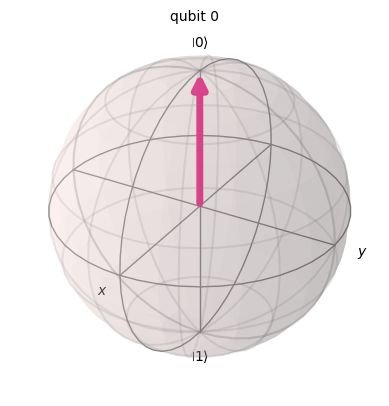

In [ ]:
plot_bloch_multivector(sv) # let's see the original state on the Bloch sphere

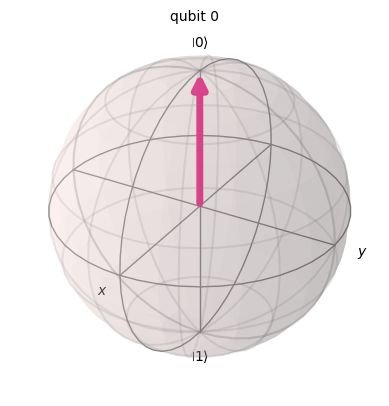

In [ ]:
plot_bloch_multivector(new_sv)  # let's see the new state on the Bloch sphere

### The Q-sphere

[링크 텍스트](https://)The Q-sphere is important - it is the Qiskit logo!

The Q-sphere is Qiskit's unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

In [ ]:
from qiskit.visualization import plot_state_qsphere

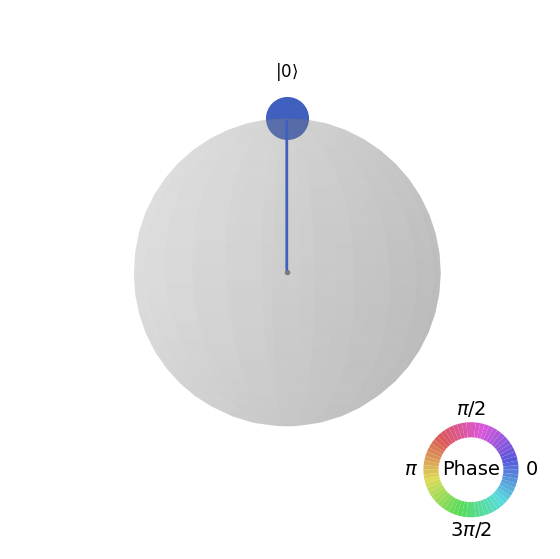

In [ ]:
plot_state_qsphere(sv)

The result is telling us that the state `sv` is

$$ \vert \psi \rangle = e^{i\cdot 0} \vert 0\rangle = \vert 0\rangle$$

Now let's look at the state `new_sv`

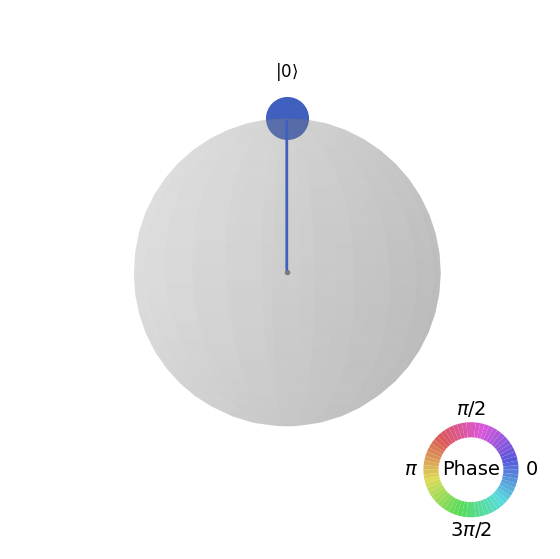

In [ ]:
plot_state_qsphere(new_sv)

The result shows that `sv` and `new_sv` are the same, as expected.

### City view

Plot the cityscape of quantum state. This is a standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city. Recall that for a state

$$ \vert \psi \rangle = \begin{bmatrix}a\\b\end{bmatrix}$$

the state matrix is

$$ \vert \psi \rangle \langle \psi \vert = \begin{bmatrix}a\\b\end{bmatrix} \begin{bmatrix}a^* & b^*\end{bmatrix} = \begin{bmatrix}aa^* & ab^* \\ ba^* & bb^* \end{bmatrix}$$

In [ ]:
from qiskit.visualization import plot_state_city

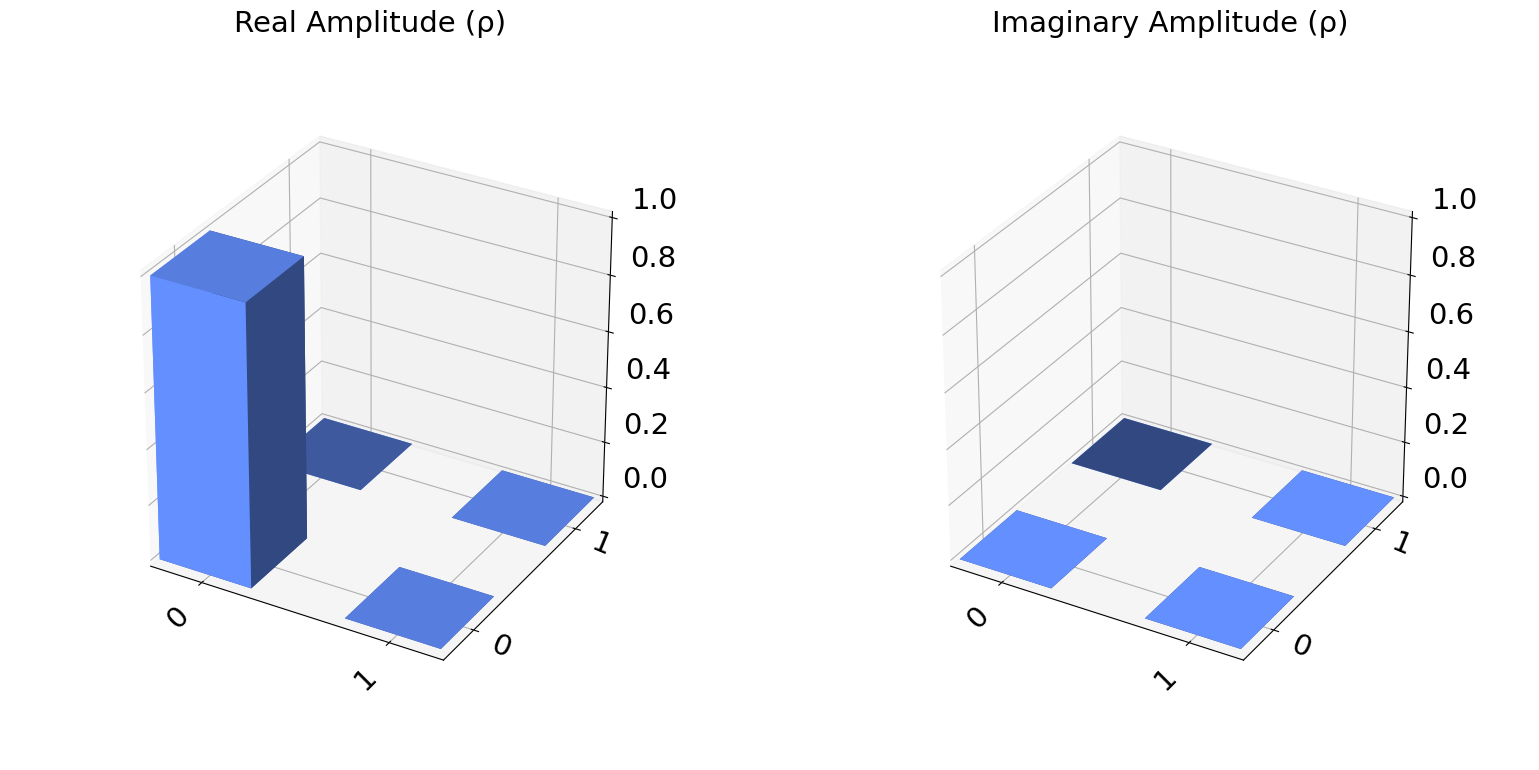

In [ ]:
plot_state_city(sv)

### Expansion into Pauli vectors

This is a representation of the state matrix using Pauli operators as the basis.

In [ ]:
from qiskit.visualization import plot_state_paulivec

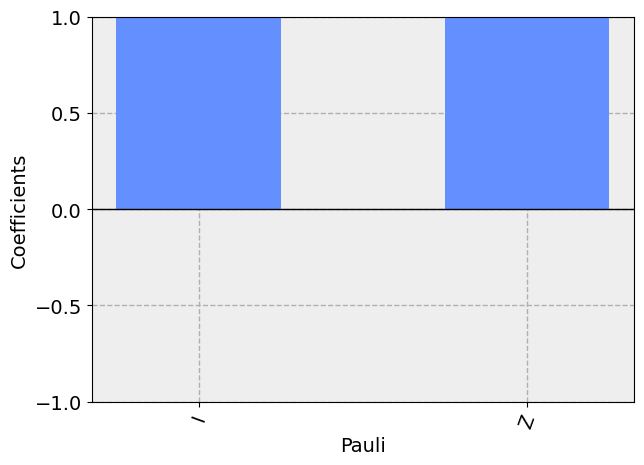

In [ ]:
plot_state_paulivec(sv)

This shows that the state `sv` is

$$ 0.5 I + 0.5 \sigma_z =
0.5 \begin{bmatrix} 1&0\\0&1 \end{bmatrix} +
0.5 \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}
= \begin{bmatrix} 1&0\\0&0 \end{bmatrix}$$

### Hinton diagram

Plots a hinton diagram for the density matrix of a quantum state. Same as 'city' but the size of the element represents the value of the matrix element.

In [ ]:
from qiskit.visualization import plot_state_hinton

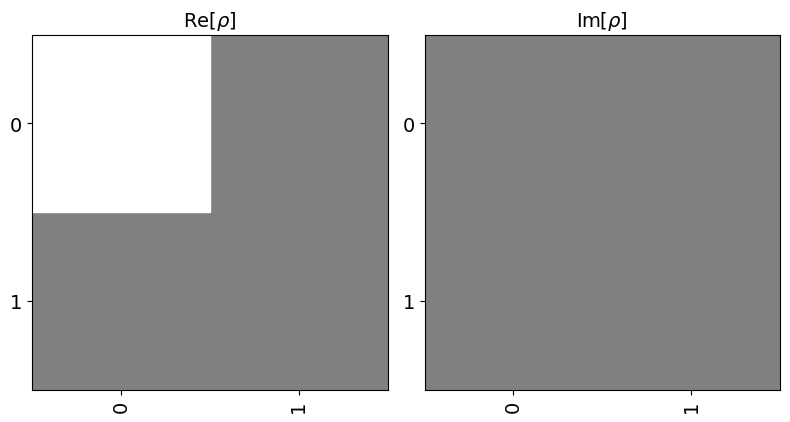

In [ ]:
plot_state_hinton(sv)

# Creating other states

### The state $\vert +\rangle$

Let us now create the other 5 states, starting with
$$\vert +\rangle = \frac{1}{\sqrt{2}}
\left(\vert 0\rangle + \vert 1\rangle\right) = \begin{bmatrix}
\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}
= \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5\end{bmatrix}$$

In [ ]:
sv = Statevector.from_label('+')  # creating a state vector labelled '+'

Let's see what's contained in the object `sv`:

In [ ]:
sv

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [ ]:
sv.data

array([0.70710678+0.j, 0.70710678+0.j])

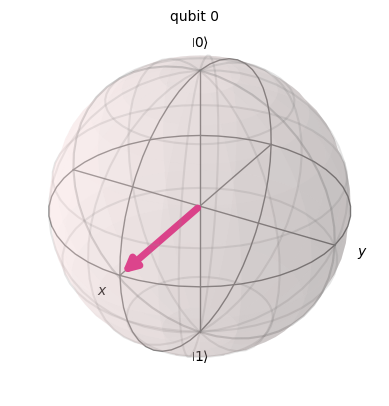

In [ ]:
plot_bloch_multivector(sv)

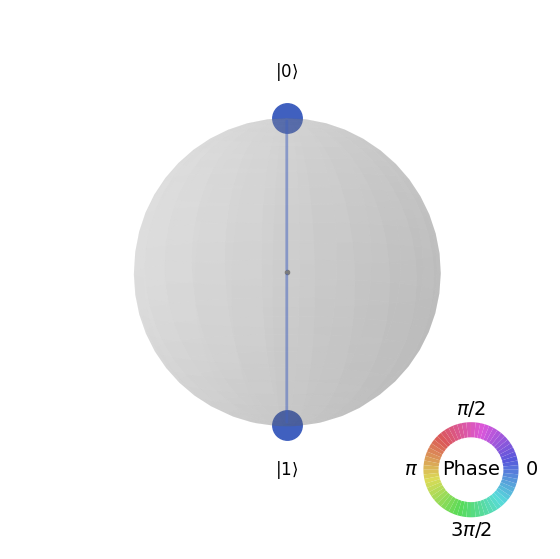

In [ ]:
plot_state_qsphere(sv)

The result is telling us that the state `sv` is

$$ \vert \psi \rangle = \frac{1}{\sqrt{2}} e^{i\cdot 0} \vert 0\rangle + \frac{1}{\sqrt{2}} e^{i\cdot 0} \vert 1\rangle
= \frac{1}{\sqrt{2}}
\left(\vert 0\rangle + \vert 1\rangle\right) $$

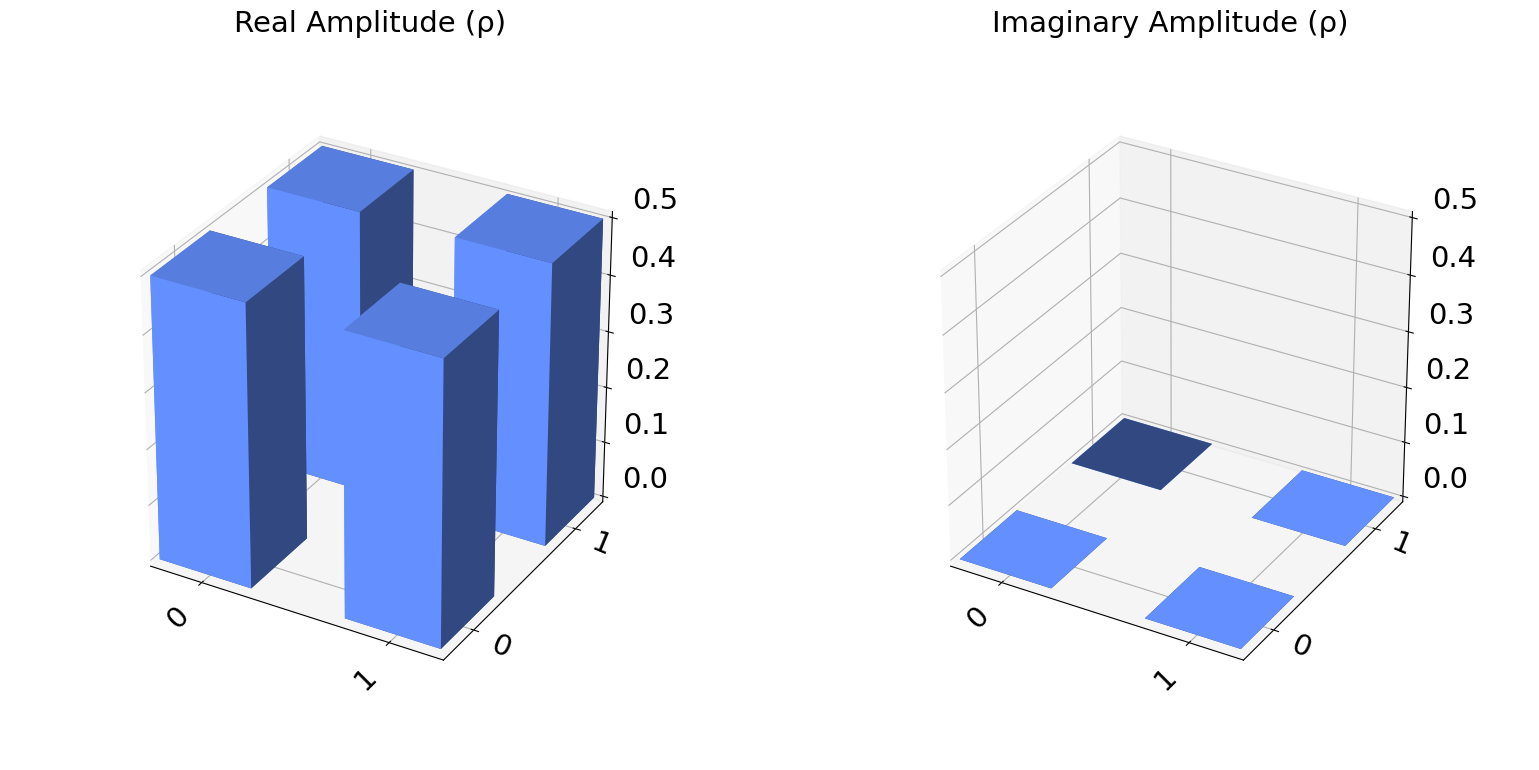

In [ ]:
plot_state_city(sv)

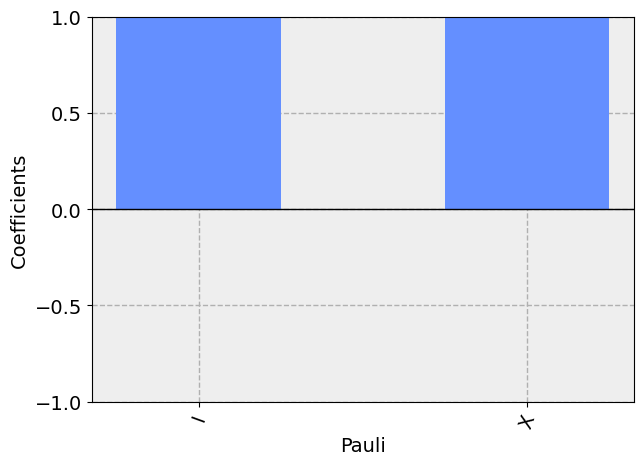

In [ ]:
plot_state_paulivec(sv)

This shows that the state `sv` is

$$ 0.5 I + 0.5 \sigma_x =
0.5 \begin{bmatrix} 1&0\\0&1 \end{bmatrix} +
0.5 \begin{bmatrix} 0&1\\1&0 \end{bmatrix}
= \begin{bmatrix} 0.5&0.5\\0.5&0.5 \end{bmatrix}$$

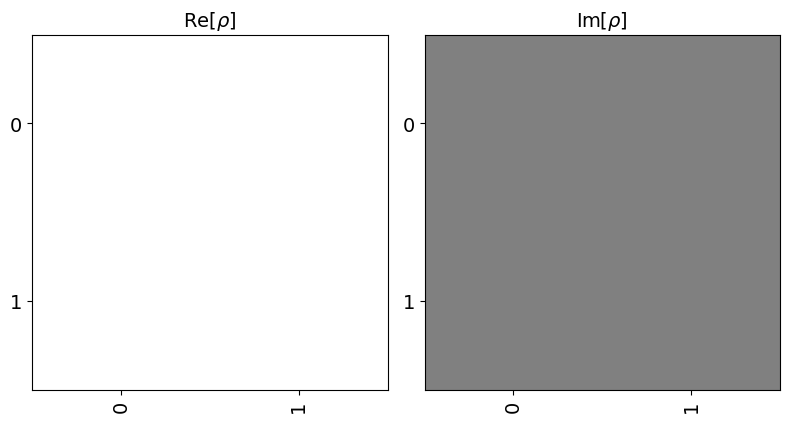

In [ ]:
plot_state_hinton(sv)

### The state $\vert +i\rangle$

Note that in Qiskit the $\vert +i\rangle$ and $\vert -i\rangle$ states are labelled `r` and `l` respectively.

In [ ]:
sv = Statevector.from_label('r')  # creating a state vector labelled '+i'

Let's see what's contained in the object `sv`:

In [ ]:
sv

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


In [ ]:
sv.data

array([0.70710678+0.j        , 0.        +0.70710678j])

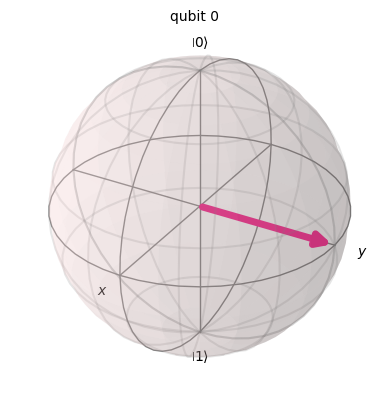

In [ ]:
plot_bloch_multivector(sv)

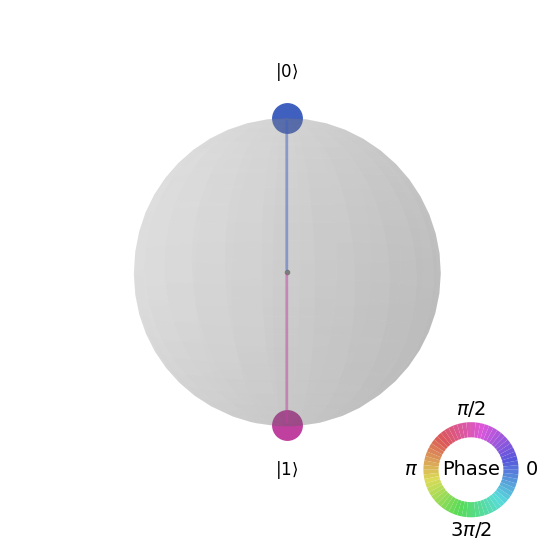

In [ ]:
plot_state_qsphere(sv)

The result is telling us that the state `sv` is

$$ \vert \psi \rangle = \frac{1}{\sqrt{2}} e^{i\cdot 0} \vert 0\rangle + \frac{1}{\sqrt{2}} e^{i\cdot \pi/2} \vert 1\rangle
= \frac{1}{\sqrt{2}}
\left(\vert 0\rangle + i \vert 1\rangle\right) $$

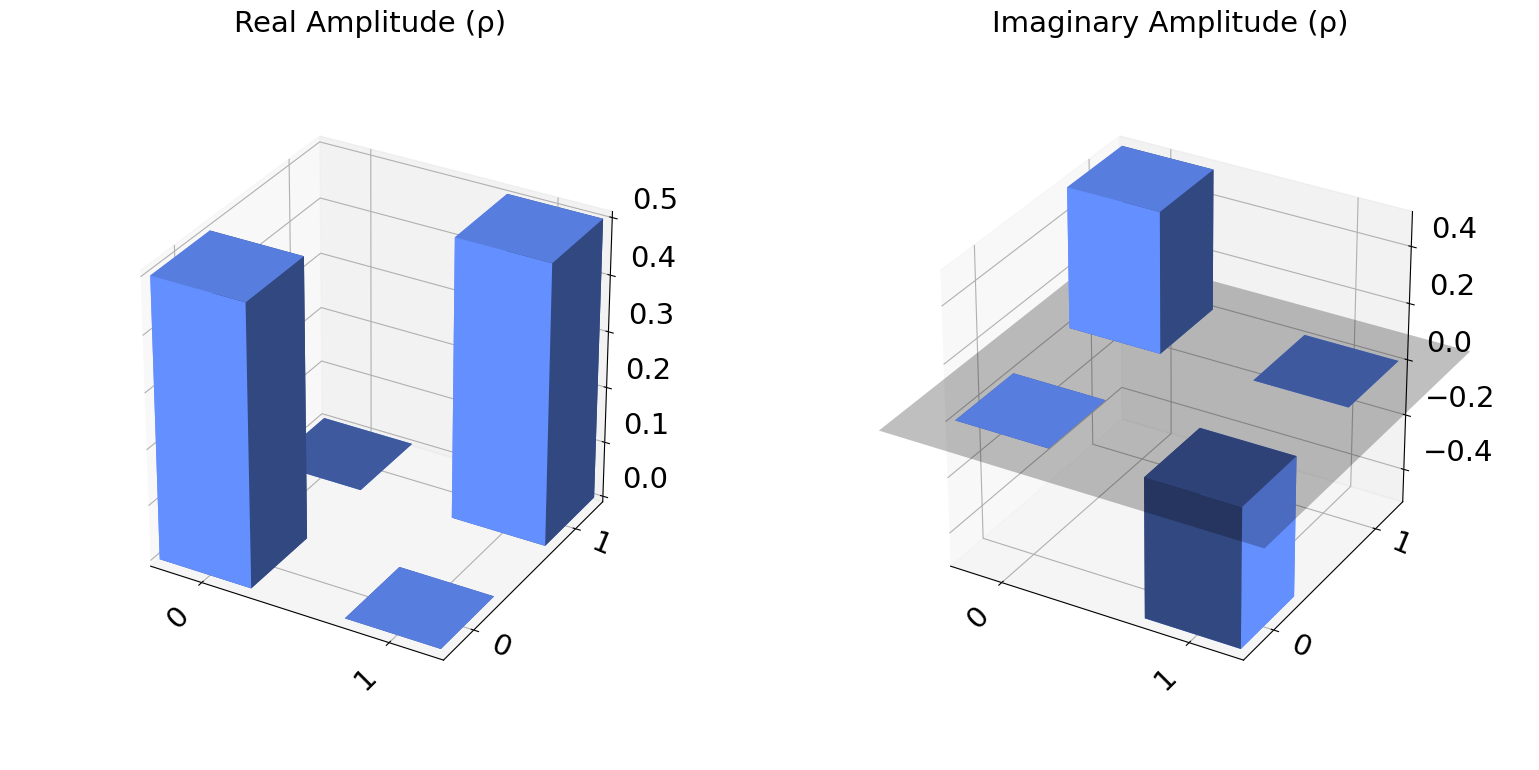

In [ ]:
plot_state_city(sv)

The state matrix is

$$ \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{bmatrix}
\begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{-i}{\sqrt{2}} \end{bmatrix}
= 0.5 \begin{bmatrix}
1 & -i \\ i & 1
\end{bmatrix}
$$

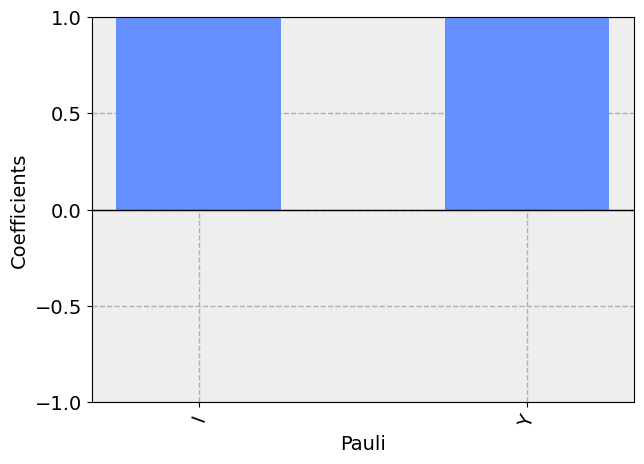

In [ ]:
plot_state_paulivec(sv)

This shows that the state `sv` is

$$ 0.5 I + 0.5 \sigma_y =
0.5 \begin{bmatrix} 1&0\\0&1 \end{bmatrix} +
0.5 \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}
= \begin{bmatrix} 0.5&-0.5i\\0.5i&0.5 \end{bmatrix}$$

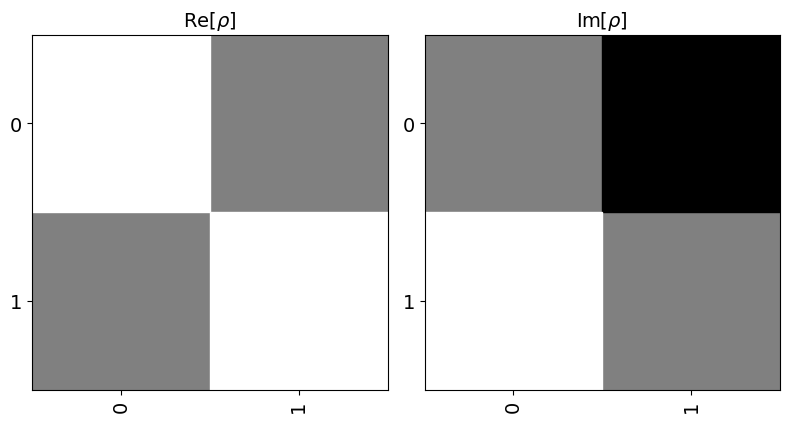

In [ ]:
plot_state_hinton(sv)